# <span style="color:darkred"><ins>Segmentation to define marketing strategy</ins></span>

A Bank has given us a large dataset. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

The marketing team wants to launch an advertising campaign by segmenting its customers into 3 different groups.

### Following is the Data Dictionary for Credit Card dataset:

* **CUSTID:** Identification of Credit Card holder (Categorical)
* **BALANCE:** Balance amount left in their account to make purchases
* **BALANCEFREQUENCY:** How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* **PURCHASES:** Amount of purchases made from account
* **ONEOFFPURCHASES:** Maximum purchase amount done in one-go
* **INSTALLMENTSPURCHASES:** Amount of purchase done in installment
* **CASHADVANCE:** Cash in advance given by the user
* **PURCHASESFREQUENCY:** How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* **ONEOFFPURCHASESFREQUENCY:** How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* **PURCHASESINSTALLMENTSFREQUENCY:** How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* **CASHADVANCEFREQUENCY:** How frequently the cash in advance being paid
* **CASHADVANCETRX:** Number of Transactions made with "Cash in Advanced"
* **PURCHASESTRX:** Numbe of purchase transactions made
* **CREDITLIMIT:** Limit of Credit Card for user
* **PAYMENTS:** Amount of Payment done by user
* **MINIMUM_PAYMENTS:** Minimum amount of payments made by user
* **PRCFULLPAYMENT:** Percent of full payment paid by user
* **TENURE:** Tenure of credit card service for user

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# 1 - Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("Marketing_data.csv")

In [3]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000



* The average balance is $1564\$$.
* The balance frequency is quite often updated, on average ~0.9 (frequently updated).
* The average of purchases is $1000\$$.
* The average of maximum purchase amount done in one-go is ~$600\$$
* The average of th frequently of purchases is ~0.5.
* On the whole, the average of *ONEOFF_PURCHASES_FREQUENCY*, *PURCHASES_INSTALLMENTS_FREQUENCY* and *CASH_ADVANCE_FREQUENCY* are low.
* The average of the limit of Credit Card for user is ~ 4500
* Percent of full payment paid by user is 15%
* Tenure of credit card service for user is 11 years.

### Let's go to figure out who has made a purchase of $\$40761$ in one-go:

In [6]:
df[df["ONEOFF_PURCHASES"] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


We can see that it belongs to a client with al lot of cash who hardly ever borrows money from the bank, and who makes a lot of card purchases.

### Let's see who paid $\$47137 $ in advance:

In [7]:
df['CASH_ADVANCE'].max()

47137.211760000006

In [8]:
df[df['CASH_ADVANCE'] == 47137.211760000006]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


This client did 123 number of Transactions made with "Cash in Advanced".

# 2 - Dataset Visualization

### First we're going to check if we have missing values:

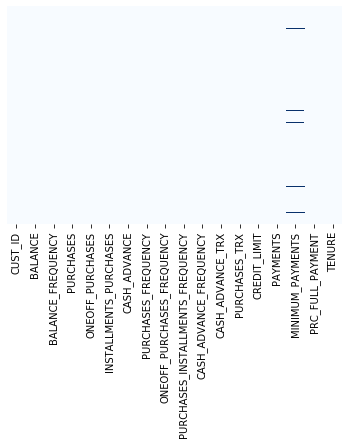

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap = "Blues")

In [10]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

**- We fill the missing values with the average of *'MINIMUM_PAYMENT'* and *'CREDIT_LIMIT'*:**

In [11]:
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()

In [12]:
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

### Second we're going to check if we have duplicate values in our data:

In [13]:
df.duplicated().sum()

0

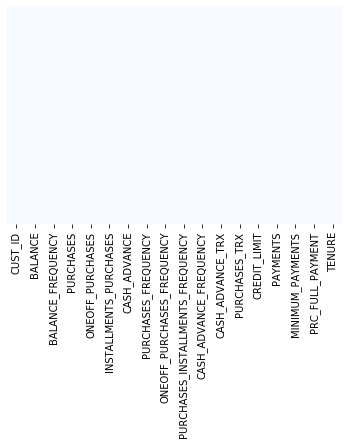

In [14]:
sns.heatmap(df.isnull(), yticklabels=False, cbar = False, cmap = "Blues")

### We can remove *CustomerID* because it doesn't useful:

In [15]:
df.drop("CUST_ID", axis = 1, inplace=True)

In [16]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [17]:
n = len(df.columns)
n

17

In [18]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

### The Kernel Density Estimate:

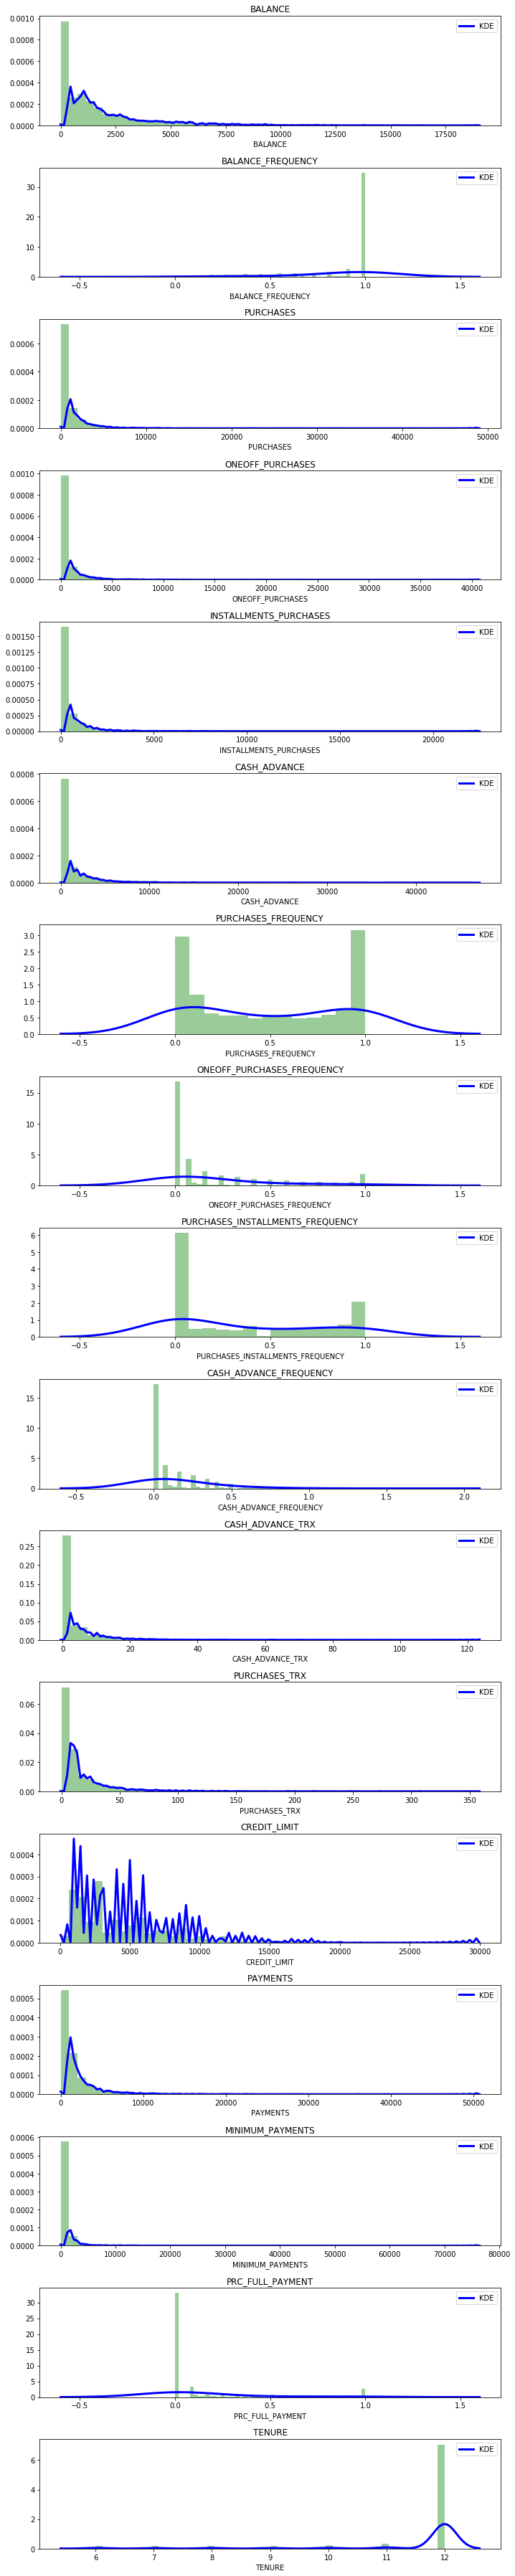

In [19]:
plt.figure(figsize = (10, 50))
for i in range(n):
    plt.subplot(n, 1, i+1)
    sns.distplot(df[df.columns[i]], kde_kws = {"color": "b", "lw": 3, "label": "KDE", 'bw': 0.2}, hist_kws={"color": "g"})
    plt.title(df.columns[i])

plt.tight_layout()

### Correlation between variables:

In [20]:
correlations = df.corr()

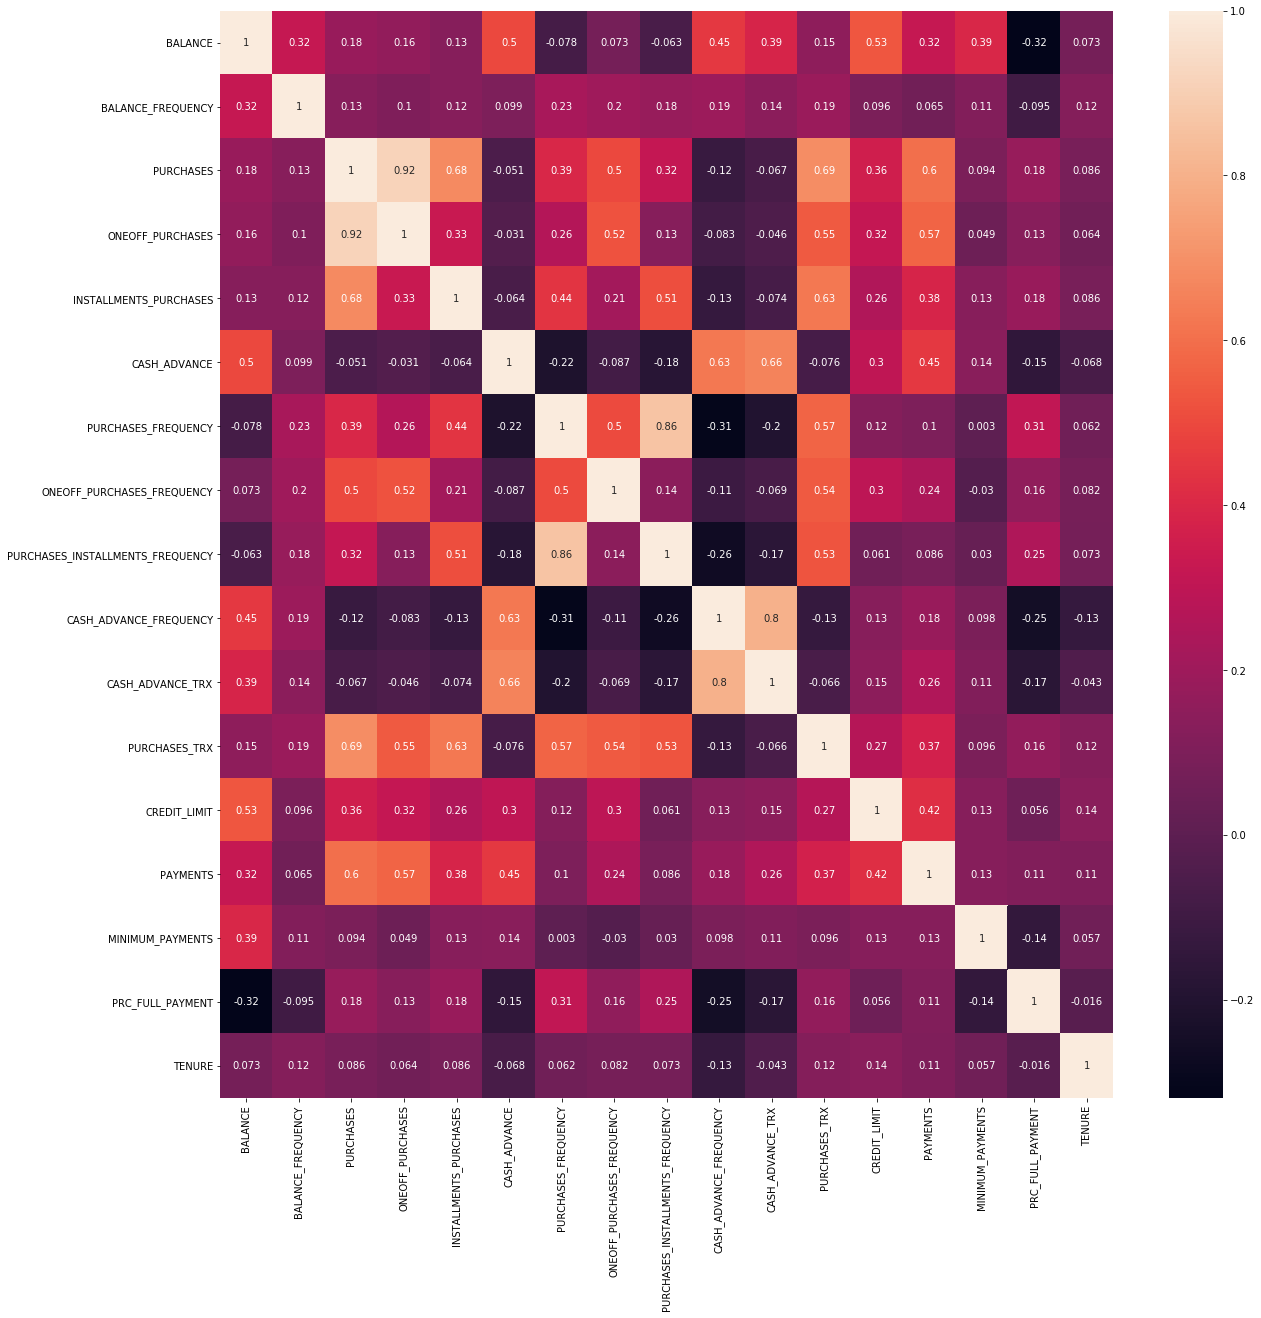

In [21]:
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot = True)

* There is a correlation between *PURCHASES* and *ONEOFF_PURCHASES* and *INSTALMENT_PURCHASES* variables.
* We also can see a tend between *PURCHASES* with *CREDIT_LIMIT* and *PAYMENTS*.
* High correlation between *PURCHASES_FREQUENCY* and *PURCHASES_INSTALLMENT_FREQUENCY* too.

# 3 - Finding the optimal number of clusters using 'The Elbow Method'

- ***'The Elbow Method'*** consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use. This method has been designed to help to find the appropriate number of clusters in our dataset.
- If the line graph looks like an "arm", then the "elbow" on the arm is the value of ***k***. This ***k*** will be our number of clusters.

Source: 
  - https://en.wikipedia.org/wiki/Elbow_method_(clustering)
  - https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

### First let's start scaling our dataset. In this way no varaible will stand out.

In [22]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [23]:
df_scaled.shape

(8950, 17)

In [24]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

**- We apply the elbow method:**

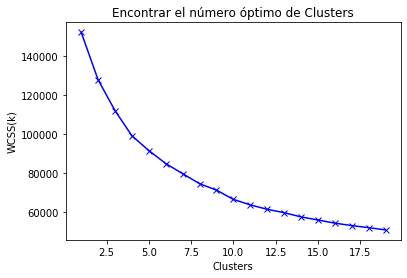

In [25]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_scaled)
    scores_1.append(kmeans.inertia_) #WCSS


plt.plot(range_values, scores_1, 'bx-')
plt.title("Encontrar el número óptimo de Clusters")
plt.xlabel("Clusters")
plt.ylabel("WCSS(k)")
plt.show()


* The tendency of the "arm" tends to smooth the curve out (our "elbow") about cluster's number 4.
* The values aren't reduced a linear tendency until the 8th cluster. We choose this number.

# 4 - K-Means Method

In [26]:
kmeans = KMeans(8)
kmeans.fit(df_scaled)
labels = kmeans.labels_
labels 

array([1, 3, 6, ..., 7, 7, 7], dtype=int32)

Cluster number of each point.

In [27]:
kmeans.cluster_centers_.shape #we have 8 baricentros con las 17 variables(features)

(8, 17)

We have 8 barycenters and 17 features.

In [28]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.361746,0.332427,-0.034919,-0.242534,0.362821,-0.363296,0.993026,-0.383768,1.205252,-0.473549,-0.360250,0.189465,-0.261298,-0.214984,-0.030438,0.313451,0.256258
1,0.012363,0.404002,-0.357001,-0.241611,-0.400131,-0.094194,-0.852812,-0.394335,-0.754538,0.103185,-0.028265,-0.481551,-0.303354,-0.249373,-0.011771,-0.455386,0.273280
2,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409
3,1.686129,0.393025,-0.217205,-0.155325,-0.228287,2.009008,-0.470733,-0.207959,-0.411112,1.913538,1.919868,-0.265613,1.029379,0.818956,0.552301,-0.390101,0.071370
4,-0.701258,-2.140285,-0.310336,-0.234722,-0.302444,-0.322272,-0.554827,-0.441460,-0.440553,-0.521236,-0.376356,-0.419376,-0.176011,-0.202115,-0.256800,0.283165,0.198977
5,1.039400,0.464856,2.504641,1.808428,2.599812,-0.161205,1.164502,1.562982,1.272947,-0.286097,-0.150710,3.134487,1.297181,1.439786,0.560536,0.253915,0.337460
6,-0.132975,0.400605,0.541559,0.671442,0.046770,-0.331239,0.980011,1.904813,0.171671,-0.412879,-0.329926,0.618406,0.434597,0.144731,-0.158053,0.444399,0.268773
7,-0.336228,-0.347383,-0.287908,-0.214195,-0.286875,0.067425,-0.201713,-0.285924,-0.224146,0.307084,0.000231,-0.387540,-0.563820,-0.392784,-0.209266,0.014243,-3.202809


### The inverse transformation of scaling is applied to understand better this values.

In [29]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,811.530431,0.956020,928.599272,189.879812,739.162116,217.022499,0.888900,0.087972,0.843436,0.040382,0.790387,19.419227,3543.741428,1110.786328,793.273098,0.245394,11.860258
1,1590.206589,0.972975,240.466411,191.411976,49.234195,781.342922,0.148076,0.084820,0.064565,0.155793,3.055939,2.740283,3390.725269,1011.232951,836.775777,0.020522,11.883037
2,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667
3,5074.010044,0.970375,539.143482,334.629072,204.630871,5191.855751,0.301422,0.140419,0.201051,0.518063,16.350515,8.107675,8239.753202,4103.940565,2151.320463,0.039617,11.612829
4,104.865352,0.370257,340.166450,202.846306,137.571031,303.051343,0.267672,0.070762,0.189350,0.030840,0.680473,4.285714,3854.048558,1148.040394,265.744196,0.236535,11.783601
5,3727.898336,0.987391,6354.408362,3594.057458,2762.045819,640.817196,0.957721,0.668725,0.870339,0.077893,2.220339,92.621469,9214.124294,5901.184611,2170.512276,0.227980,11.968927
6,1287.698840,0.972170,2160.255009,1706.894046,453.360963,284.247254,0.883676,0.770700,0.432664,0.052523,0.997326,30.081105,6075.692756,2152.127140,495.870743,0.283694,11.877005
7,864.645308,0.794979,388.085586,236.917416,151.649711,1120.263874,0.409393,0.117161,0.275356,0.196595,3.250401,5.077047,2443.040850,596.072587,376.521919,0.157880,7.231140


* **First Cluster of Clients (Transactors):** Those are the clients who pay the least amount of interest charges and they are very careful with their money. The lowest balance ($ 104) and cash advance ($ 303). Full payment = 23%.
* **Second Cluster of clients (Revolvers):** They use the credit card as a loan (the most lucrative sector): higher balance (`$ 5000`) and cash advance (` ~ $ 5000), low purchase frequency, high advance frequency cash (`0.5`), high cash advance transactions (` 16`) and low payment percentage (3%).
* **Third Cluster of Clients (VIP / Prime):** High credit limit `$ 16K` and higher percentage of full payment, goal to increase credit limit and increase spending habits.
* **Fourth Cluster of Clients (low tenure):** They are clients with low seniority (7 years), low balance.

In [30]:
labels.shape

(8950,)

In [31]:
labels.min()

0

In [32]:
labels.max()

7

**- We can also make predictions:**

In [33]:
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans

array([0, 2, 5, ..., 6, 6, 6], dtype=int32)

### Let's go to concatenate clusters' labels with the original dataset. In this way we can see which cluster each observation belongs to:

In [34]:
df_cluster = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,6
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


**- We visualize histograms for each cluster:**

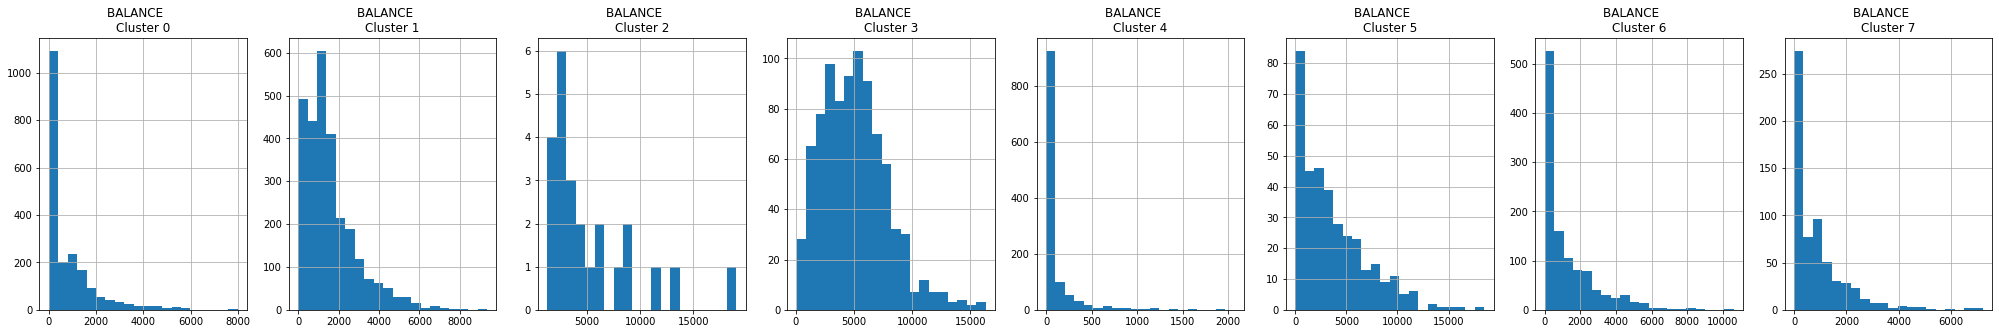

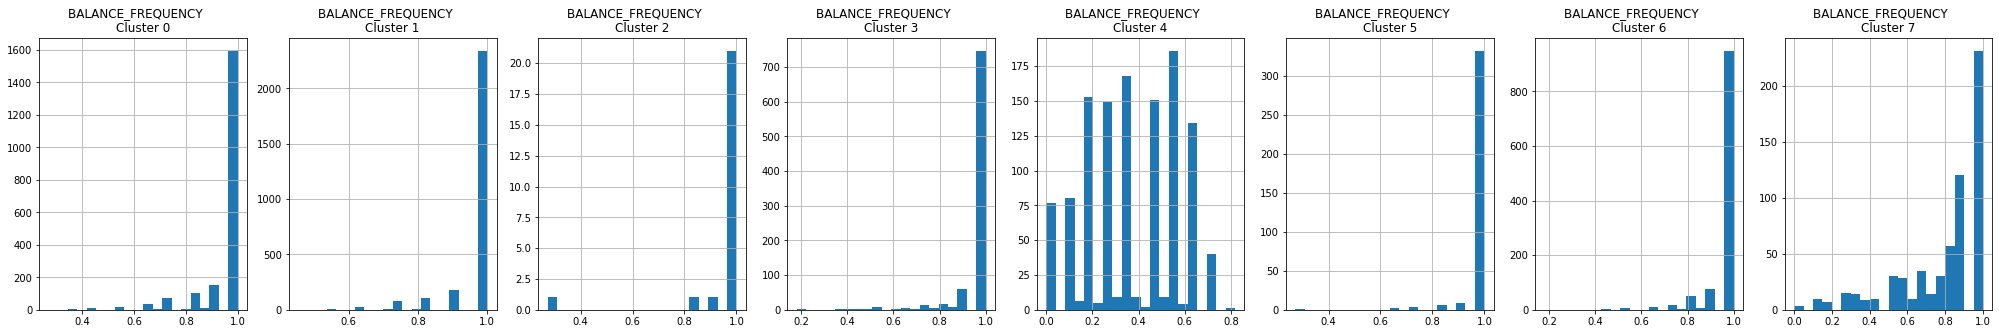

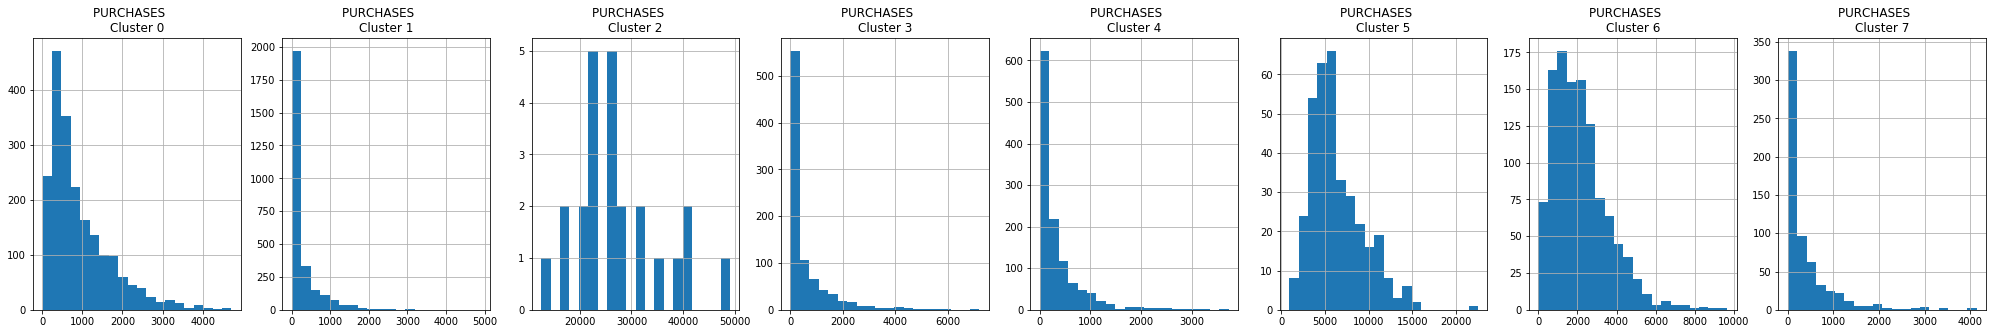

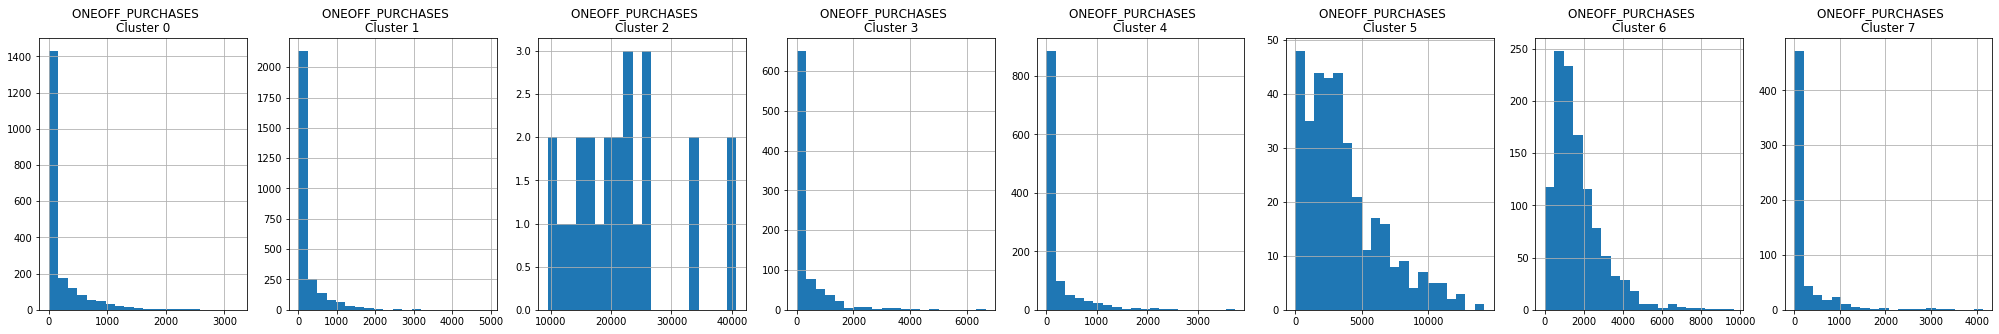

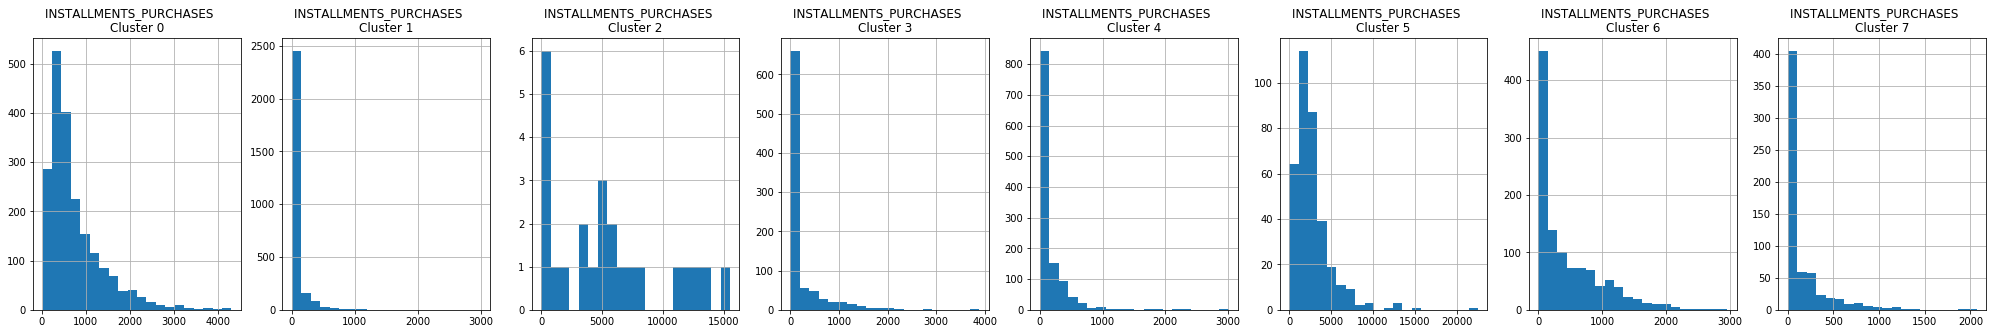

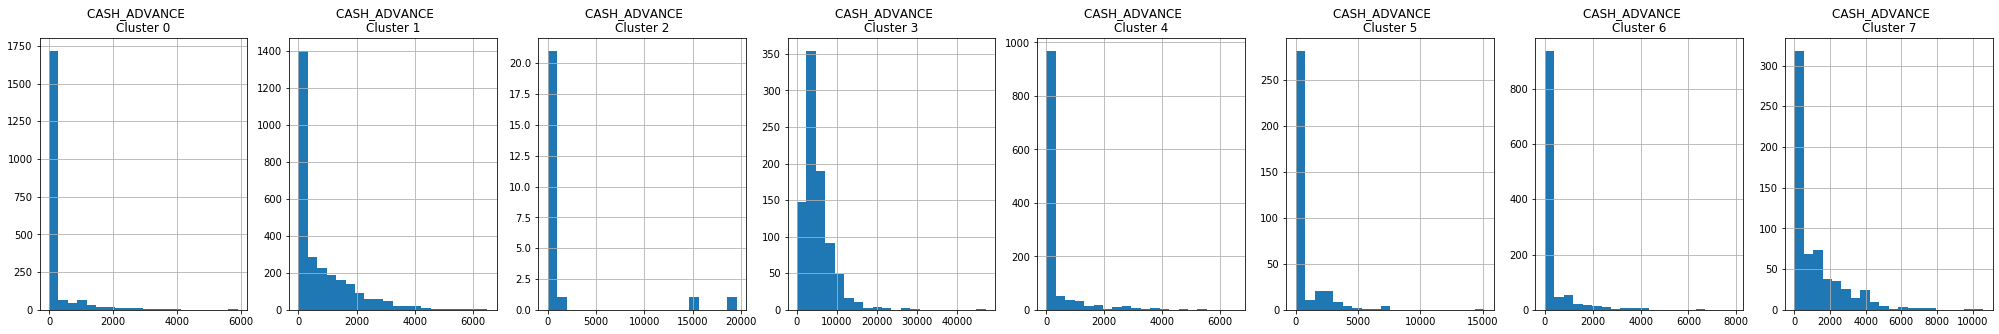

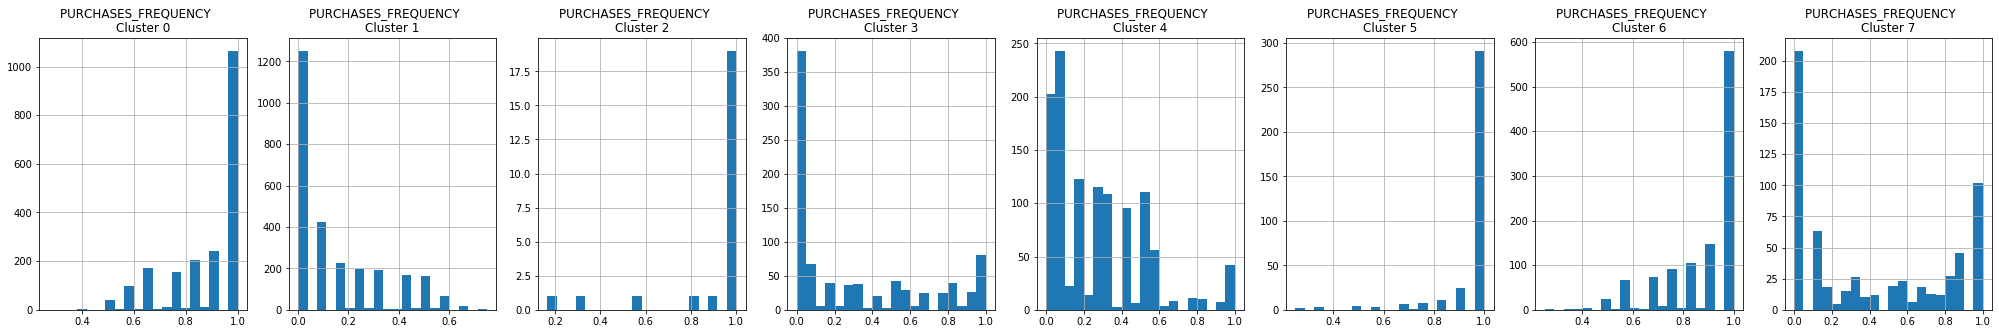

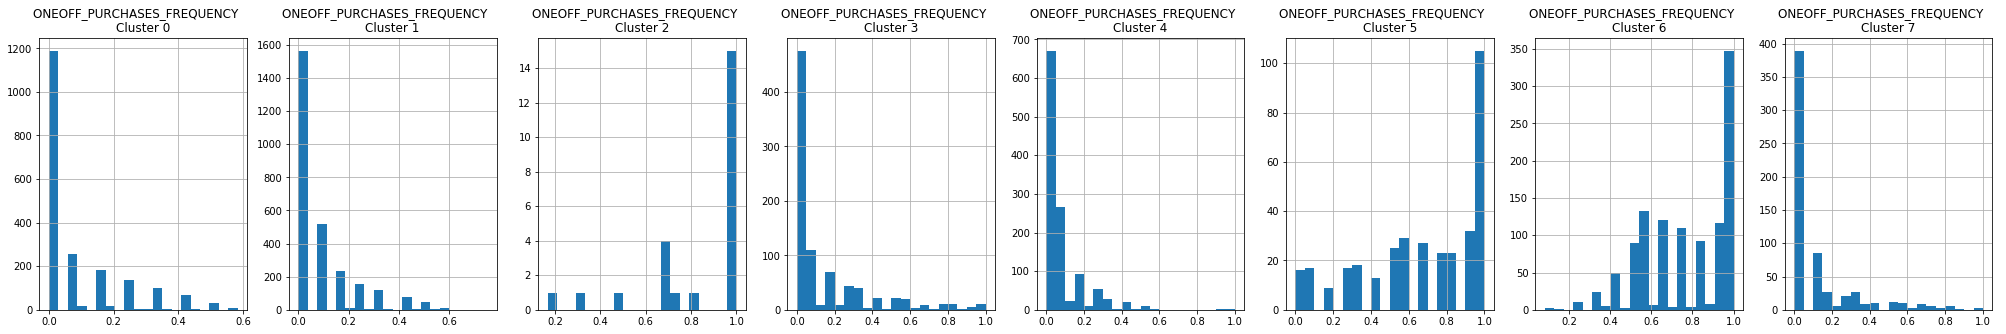

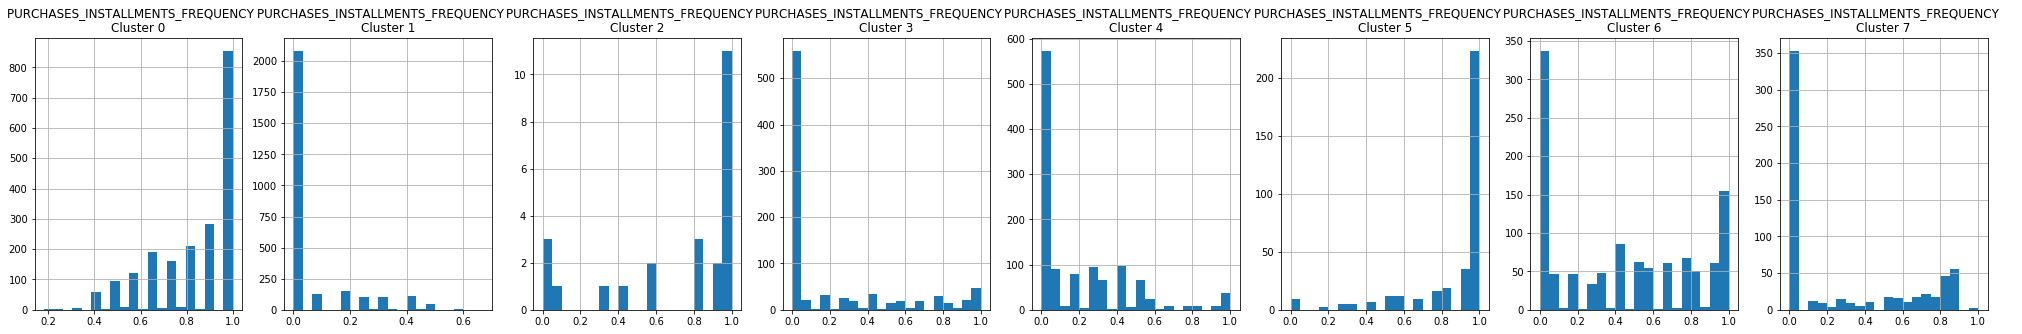

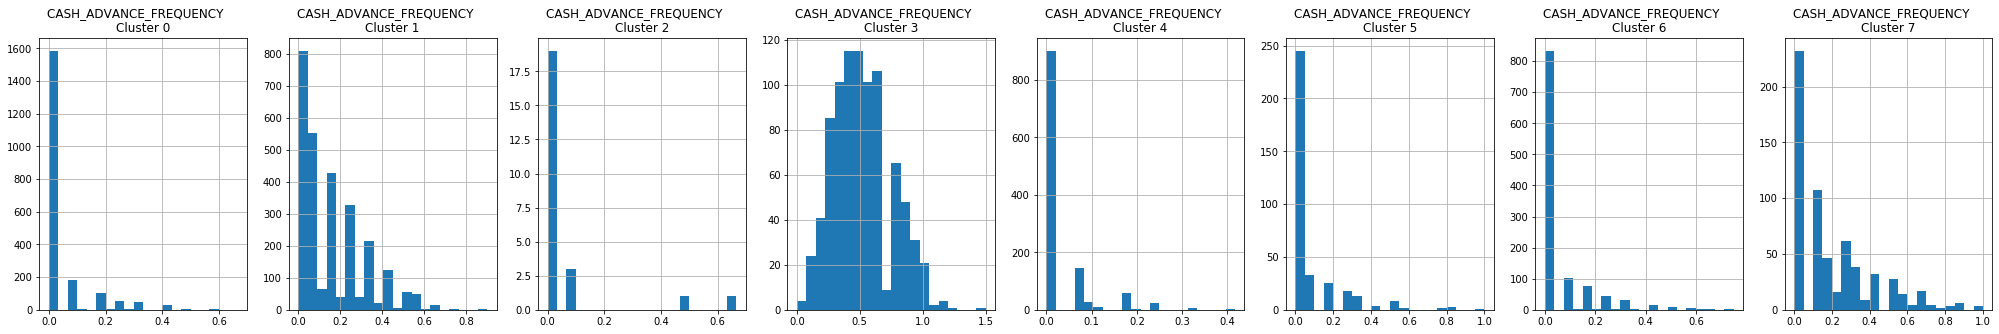

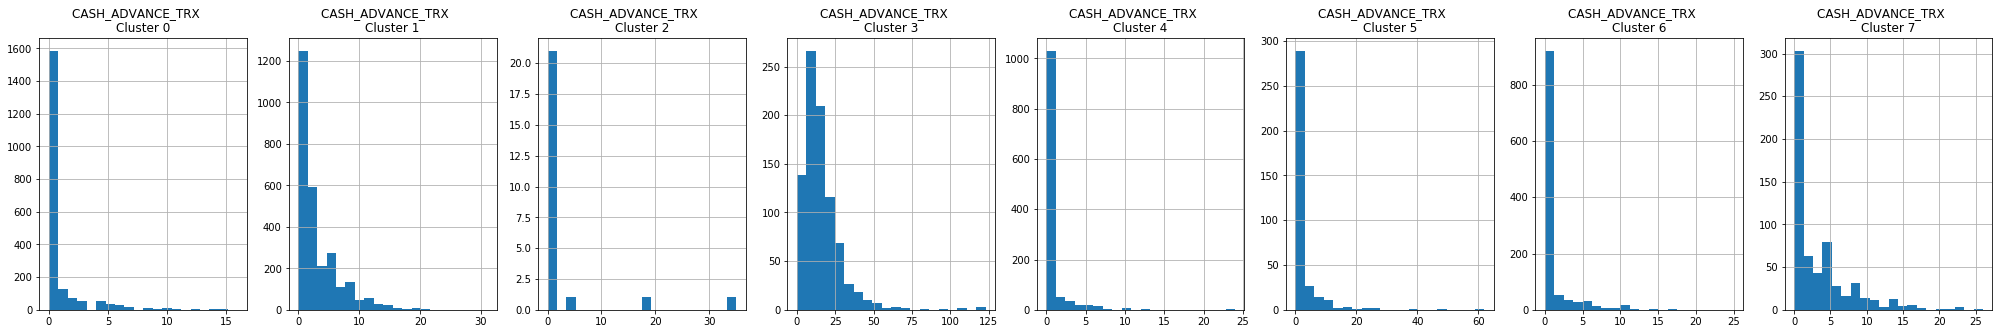

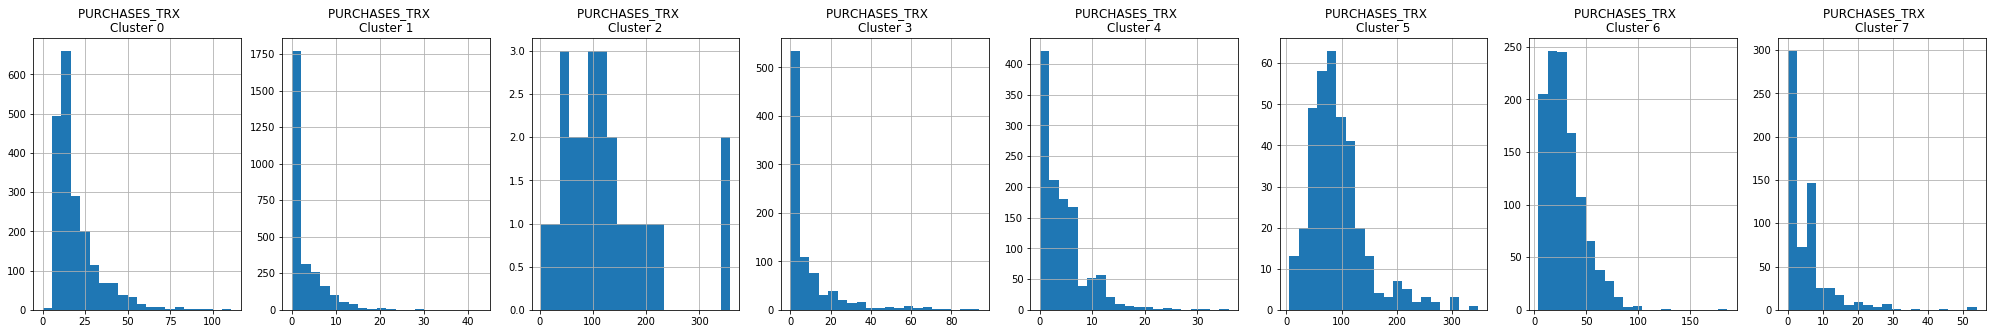

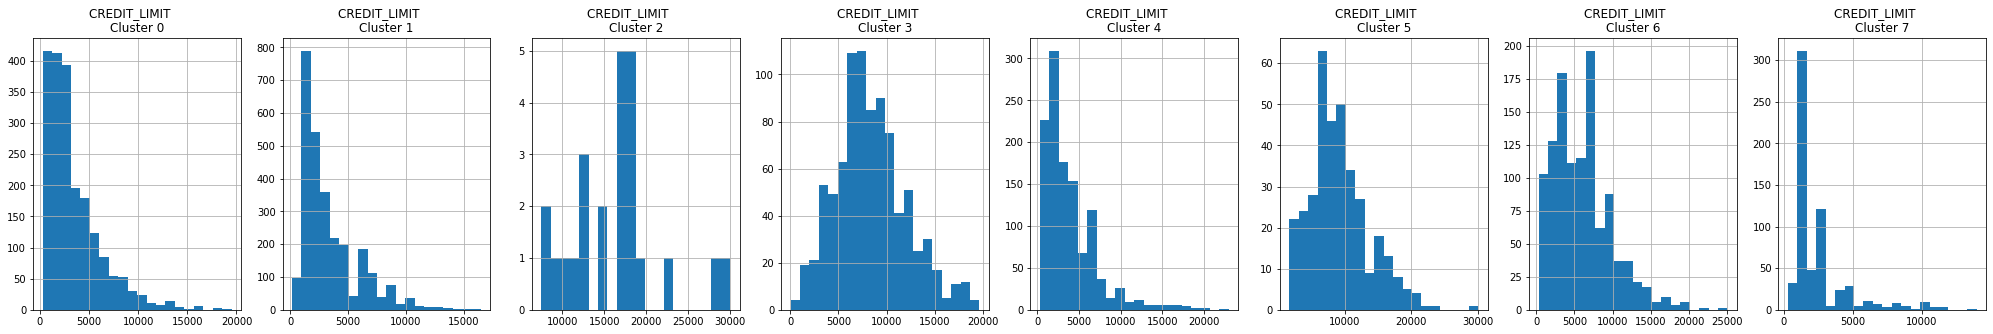

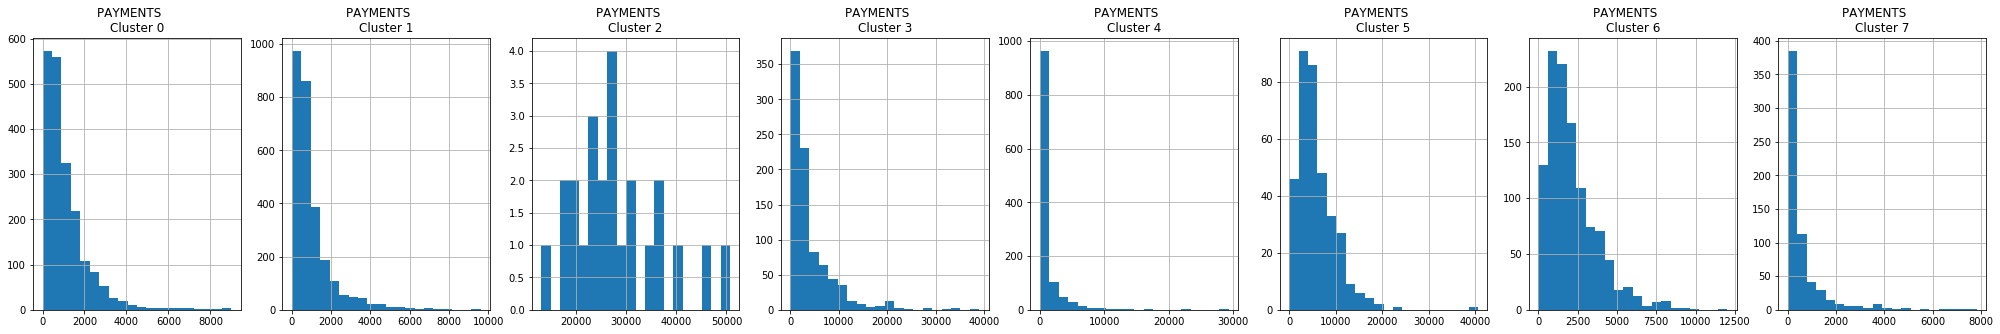

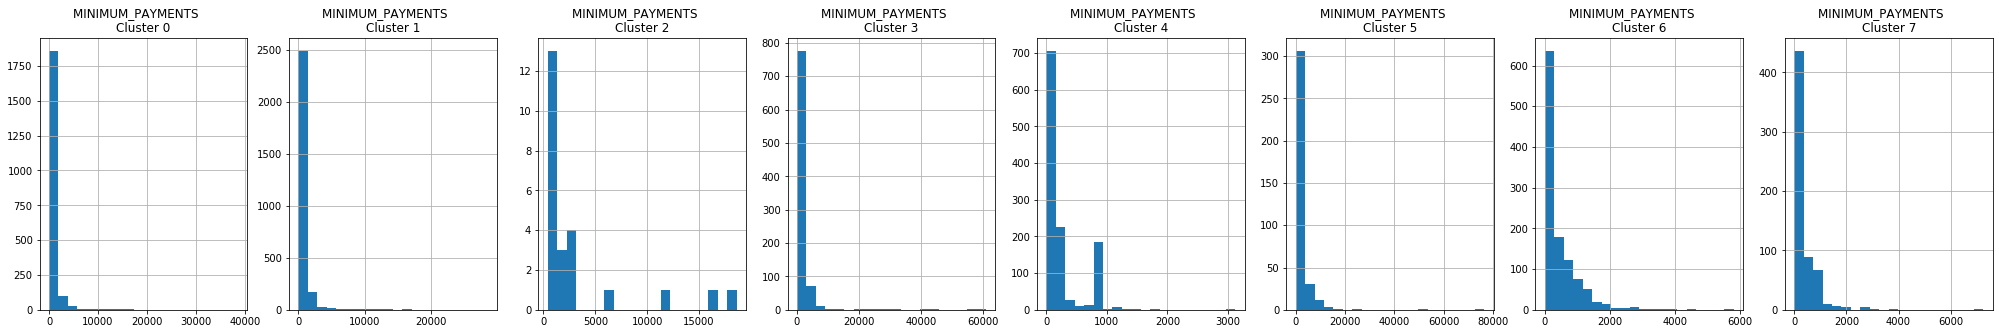

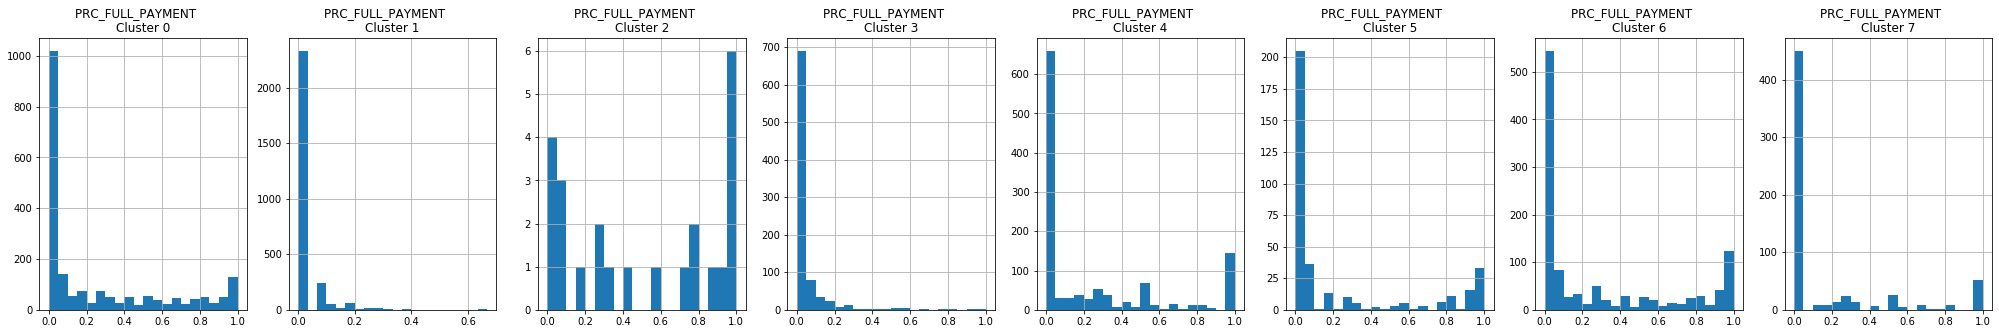

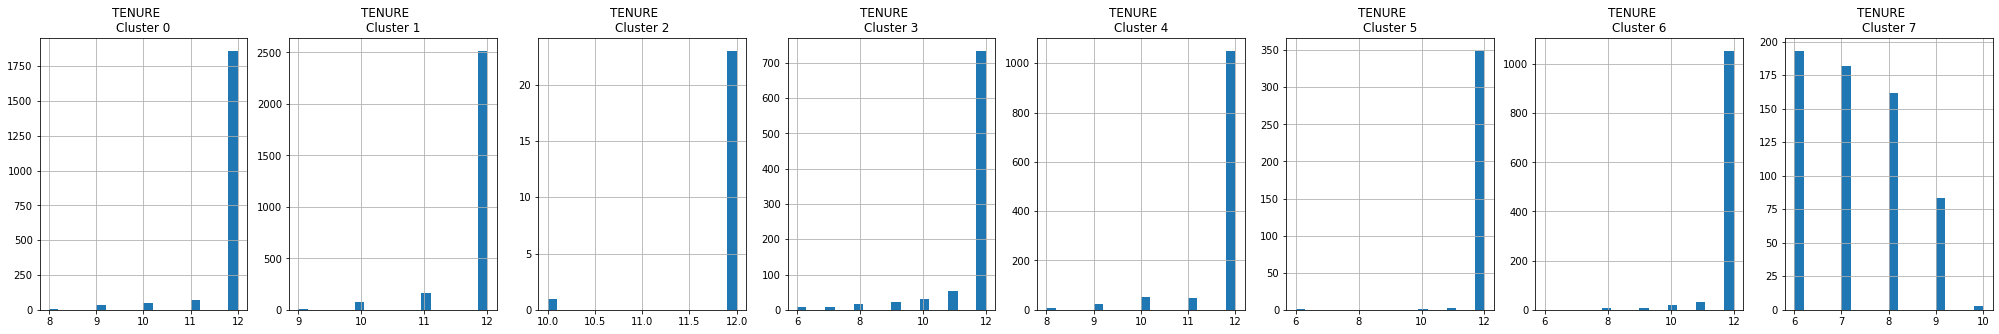

In [35]:
for i in df.columns:
    plt.figure(figsize=(35, 5))
    for j in range(8):
        plt.subplot(1, 8, j+1)
        cluster = df_cluster[df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}    \nCluster {}'.format(i, j))
    plt.show()

# 5 - Principal Component Analysis *(PCA)*

In [36]:
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df_scaled)
principal_comp

array([[-1.68221922, -1.07645126],
       [-1.13829358,  2.50647075],
       [ 0.96968292, -0.38350887],
       ...,
       [-0.92620252, -1.81078537],
       [-2.33655126, -0.65796865],
       [-0.55642498, -0.40046541]])

### We're going to create a dataframe with the two components:

In [37]:
pca_df = pd.DataFrame(data = principal_comp, columns=["pca1", "pca2"])
pca_df.head()

,pca1,pca2
0,-1.682219,-1.076451
1,-1.138294,2.506471
2,0.969683,-0.383509
3,-0.873627,0.043164
4,-1.599433,-0.688581


### Let's go to concatenate clusters' labels with the principals components' dataset:

In [38]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682219,-1.076451,1
1,-1.138294,2.506471,3
2,0.969683,-0.383509,6
3,-0.873627,0.043164,1
4,-1.599433,-0.688581,1


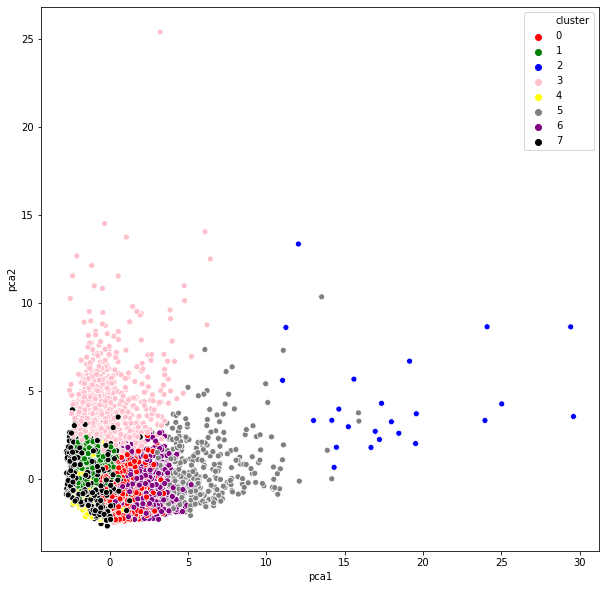

In [39]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = "pca1", y = "pca2", hue = "cluster", data = pca_df,
                     palette = ["red", "green", "blue", "pink", "yellow", "gray", "purple", "black"])
plt.show()

* PCA has reduced our `17` dimensions to only `2` (it must be taken into account the K-means method was applied before the PCA, that's why some overlapping groups appear).
* The pink's cluster are much more scatted than the rest. While the yellow ones have a lot of information that goes to *pca2*, or the blue ones (they are grouped around *pca1*).
* The rest of them are near to `0`, which means that they have similar values.

* Comprobamos cómo el PCA ha reducido las `17` dimensiones de nuestras observaciones a solo `2` (hay que tener en cuenta que el método K-means se aplicó antes del PCA por eso aparecen algunos grupos superpuestos).
* Los del cluster rosa están mucho más dispersos mientras que las amarillas hay mucha información que se dirige a la *pca2*, o las azules que se agrupan entorno a *pca1*.
* El resto están enotrno a `0` lo que indica que tienen valores parecidos entre ellos.

# 6 -  Autoencoders: Neuronal Network to reduce the dimension of our dataset.

In [40]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD #stochastic grade descent

#Compress all info into 7 dimensions.
encoding_dim = 7 

input_df = Input(shape = (17, ))

### Let's go to create de layers:

In [41]:

#The ReLU's activation function (Rectified Linear Unit)
x = Dense(encoding_dim, activation = 'relu')(input_df)

#3 hidden layers.
# Glorot normal inicializador (Xavier normal initializer) it takes a random samples of a truncated normal distribution
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 

#We finally encode everything to only 10 neurons (the info in the encoder layer)
encoded = Dense(10, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 

#decompress (it does't have to be symmetrical, we avoid multicollinearity)
x = Dense(2000, activation = 'relu', kernel_initializer = 'glorot_uniform')(encoded) 
x = Dense(500, activation = 'relu', kernel_initializer = 'glorot_uniform')(x) 

#we finally decode everything to the initial 17 variables
decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

#we define the autoencoder with the layer model
autoencoder = Model(input_df, decoded) 
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

#we save the compression part, we'll use it later to verify our model
encoder = Model(input_df, encoded) 

In [42]:
df_scaled.shape

(8950, 17)

In [43]:
autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 17)]              0         
_________________________________________________________________
dense (Dense)                (None, 7)                 126       
_________________________________________________________________
dense_1 (Dense)              (None, 500)               4000      
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 2000)              1002000   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                20010     
_________________________________________________________________
dense_5 (Dense)              (None, 2000)             

In [44]:
autoencoder.fit(df_scaled, df_scaled, batch_size=128, epochs = 25, verbose = 1)

Epoch 1/25
70/70 [==============================] - 3s 42ms/step - loss: 0.6645
Epoch 2/25
70/70 [==============================] - 3s 37ms/step - loss: 0.3590
Epoch 3/25
70/70 [==============================] - 3s 39ms/step - loss: 0.2527
Epoch 4/25
70/70 [==============================] - 2s 35ms/step - loss: 0.1980
Epoch 5/25
70/70 [==============================] - 2s 35ms/step - loss: 0.1706
Epoch 6/25
70/70 [==============================] - 3s 44ms/step - loss: 0.1584
Epoch 7/25
70/70 [==============================] - 3s 37ms/step - loss: 0.1404
Epoch 8/25
70/70 [==============================] - 3s 40ms/step - loss: 0.1285
Epoch 9/25
70/70 [==============================] - 3s 37ms/step - loss: 0.1284
Epoch 10/25
70/70 [==============================] - 3s 45ms/step - loss: 0.1135
Epoch 11/25
70/70 [==============================] - 3s 45ms/step - loss: 0.1050
Epoch 12/25
70/70 [==============================] - 3s 38ms/step - loss: 0.1013
Epoch 13/25
70/70 [==================

We obtain a loss function of **0.0657.**

**- We save the weights to make the predictions:**

In [45]:
autoencoder.save_weights('autoencoder.h5') #.h5 extension standar en redes neuronales

**- We apply the encoder created above (the first half of our network belongs to the encode part) to predict:**

In [46]:
pred = encoder.predict(df_scaled)

In [47]:
pred.shape

(8950, 10)

We have 10 characteristics. They correspond to half of the neural network (as we can see in the summary above).

### Let's apply K-Means:

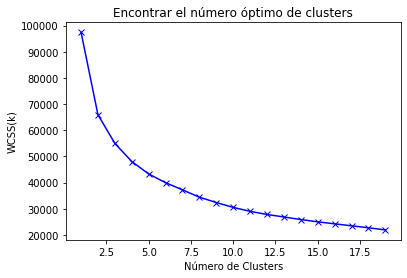

In [48]:
scores_2 = []

range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pred)
    scores_2.append(kmeans.inertia_)


plt.plot(range_values, scores_2, 'bx-')
plt.title("Encontrar el número óptimo de clusters")
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS(k)")
plt.show()

The elbow stabilizes around $k=4$.

### We're going to compare the 2 elbows obtained in this work following different paths:

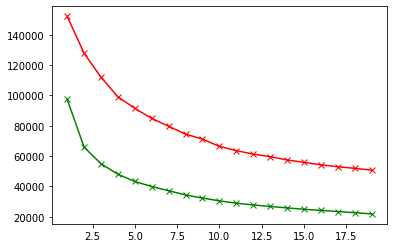

In [49]:
plt.plot(range_values, scores_1, 'bx-', color = "r")
plt.plot(range_values, scores_2, 'bx-', color = "g")

We keep **$k=4$**

In [50]:
kmeans = KMeans(4)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(pred)

In [51]:
df_cluster_dr = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [52]:
pca = PCA(n_components=2)
princ_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = princ_comp, columns=["pca1", "pca2"])
pca_df.head()

,pca1,pca2
0,-1.705835,-0.162720
1,3.051461,-1.535872
2,0.292494,1.344226
3,0.675992,0.319985
4,-1.705685,-0.063674


In [53]:
pca_df = pd.concat([pca_df, pd.DataFrame({"cluster":labels})], axis = 1)
pca_df

,pca1,pca2,cluster
0,-1.705835,-0.162720,1
1,3.051461,-1.535872,0
2,0.292494,1.344226,0
3,0.675992,0.319985,0
4,-1.705685,-0.063674,1
...,...,...,...
8945,-1.279127,-0.162793,1
8946,-1.260987,-0.569104,1
8947,-1.207046,-0.294098,1
8948,-0.051287,-0.897754,1


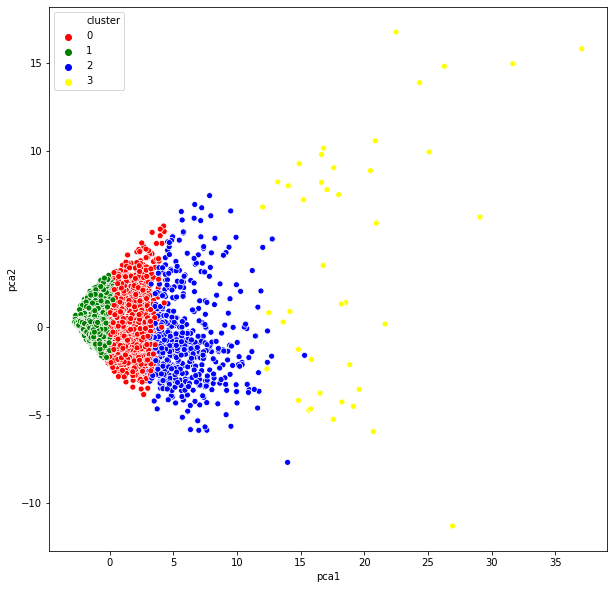

In [54]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y = "pca2", hue="cluster", data = pca_df, palette=["red", "green", "blue", "yellow"])
plt.show()

We can see how only with the first principal component (*pca1*) we could decide which cluster each observation belongs.